In [33]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt

# use h5py to read and write h5 file
import h5py

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [39]:
# grab post processing star data for a particular cycle, 34000 (try to rewrite, so use a copy of real data)
path_real = '/data/nugrid_apod2/data/set1ext/set1.2/see_wind/M2.00Z2.0e-02/M2.00Z0.020/'
path = '/user/ast501/dstephens/mppnp/Rewrite_D_TEST/'
star3_pp = mp.se(path_real)

Searching files, please wait.......
Reading preprocessor files
File search complete.Closing plot_tools



In [64]:
# rewrite and modify diffusion coefficients for the runs (33500 to 34000)
cycle_start = 53001
cycle_stop = 54000

# file string
file_string = path + 'M2.00Z0.020.0053001.se.h5'

# cycle strings
cycle_strings = []

# cycle template string
cycle_template = 'cycle{:>010d}'

# loop over all models, get the strings required
for i in range(1 + cycle_stop - cycle_start):
    cycle_strings.append(cycle_template.format(cycle_start + i))

These plots highlight the jumps in the diffusion coefficient which are strange and may affect results when modifying the diffusion coefficients

<IPython.core.display.Javascript object>


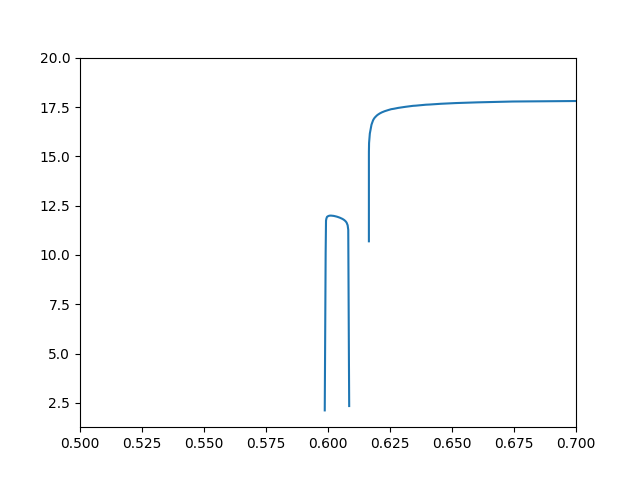

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


(0.5, 0.7)

In [44]:
# read in the data file
data_file = h5py.File(file_string,'r+')

# make a diffusion plot
offset=300
mass = data_file[cycle_strings[offset]]['SE_DATASET']['mass']
diffusion = data_file[cycle_strings[offset]]['SE_DATASET']['dcoeff']

# make a plot
plt.figure(1)

plt.plot(mass,np.log10(diffusion))

plt.xlim([0.5,0.7])

## Look at Time Steps

In [65]:
len(cycle_strings)

1000

In [45]:
data_struct = list(data_file.keys())
cyc = data_file[cycle_strings[0]]

In [46]:
# look at delta t, most likely in seconds?
print(list(cyc.attrs))
print(list(cyc.attrs.values()))

['shellnb', 'is_v_there', 'age', 'deltat', 'eps_h_max_m', 'eps_he_max_m', 'L_photosphere_Lsun', 'total_mass', 'Teff', 'X_surface_c12', 'X_surface_o16', 'X_surface_h1', 'X_surface_he4', 'logTeff', 'logL', 'R_sol']
[array([2040], dtype=int32), array([1], dtype=int32), array([  4.47437732e+16]), array([  7.19887833e+08]), array([  1.22390116e+33]), array([  1.19224905e+33]), array([ 9362.79825125]), array([  2.88723434e+33]), array([ 2642.02757638]), array([ 0.01458384]), array([ 0.01377906]), array([ 0.66587793]), array([ 0.29588279]), array([ 3.42193735]), array([ 3.97140567]), array([ 462.47363214])]


In [81]:
list(data_file.attrs.items())

[('HDF5_version', array([b'1.8.3'],
        dtype='|S6')), ('SE_version', array([b'1.2'],
        dtype='|S4')), ('icyclenb',
  array([602876736], dtype=int32)), ('firstcycle', array([53001], dtype=int32)), ('codev',
  array([b'lascar.phys.UVic.CA:/rpod2/fherwig/MESASep09/mesa6_i11:r3372'],
        dtype='|S61')), ('modname', array([b'M2.00Z0.020'],
        dtype='|S12')), ('mini', array([ 2.])), ('zini',
  array([ 0.02])), ('rotini', array([ 0.])), ('overini',
  array([ 0.014])), ('age_unit', array([ 1.])), ('one_year',
  array([ 31558149.984])), ('mass_unit',
  array([  1.98920000e+33])), ('radius_unit', array([ 1.])), ('rho_unit',
  array([ 1.])), ('temperature_unit', array([ 1.])), ('dcoeff_unit',
  array([ 1.]))]

In [47]:
# get the deltat value and print it out
print(cyc.attrs.get('deltat'))

[  7.19887833e+08]


In [84]:
# loop through every cycle list, they should all have the same deltat which is the time step
sec_yr = np.power(data_file.attrs.get('one_year'),-1)
dt = []
for i in range(len(cycle_strings)):
    
    # get the deltat number
    dt.append(data_file[cycle_strings[i]].attrs.get('deltat')[0] * sec_yr * 365.25)

In [85]:
len(dt)

1000

<IPython.core.display.Javascript object>


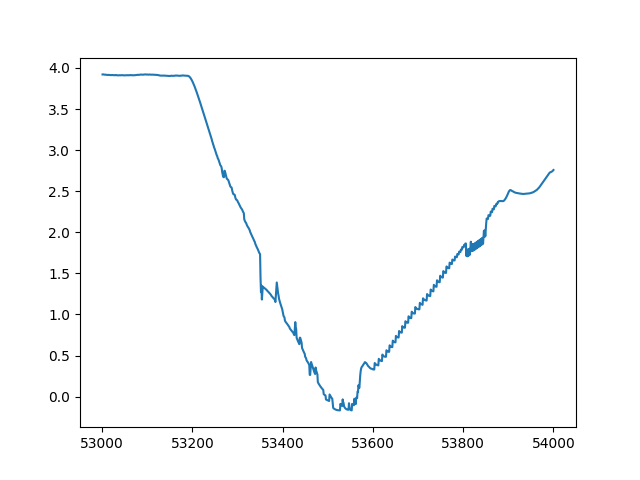

In [86]:
# make a plot of dt
plt.figure(2)
plt.plot(np.linspace(53001,54000,1000),np.log10(dt))

In [14]:
data_struct[990:1004]

['cycle0000033989',
 'cycle0000033990',
 'cycle0000033991',
 'cycle0000033992',
 'cycle0000033993',
 'cycle0000033994',
 'cycle0000033995',
 'cycle0000033996',
 'cycle0000033997',
 'cycle0000033998',
 'cycle0000033999',
 'cycle0000034000',
 'isomeric_state']

In [6]:
# look for pressure un
a = data_file[cycle_strings[0]]
list(a.keys())

['SE_DATASET']

In [ ]:
# what data do we have?
group = data_file[cycle_strings[offset]]['SE_DATASET']
temp_array = np.zeros(group.shape,group.dtype)
group.read_direct(temp_array)
temp_array

In [ ]:
# check the original data
# mass_orig = star3_pp.se.get(cycle_start+offset,'mass')
# diff_orig = star3_pp.se.get(cycle_start+offset,'dcoeff')

model = 44515
mass_orig = star3_pp.se.get(model,'mass')
diff_orig = star3_pp.se.get(model,'dcoeff')

# make plot
plt.figure(2)

plt.plot(mass_orig,np.log10(diff_orig))

plt.xlim([0.5,0.7])

In [ ]:
# store first diffusion coefficient of every cycle to check after
sanity_check = [] 

# begin looping for modifying diffusion coefficient for each cycle
for i in range(len(cycle_strings)):
    
    # read in the data
    diffusion = data_file[cycle_strings[i]]['SE_DATASET']['dcoeff']

    # set counter for storing diffusion coefficient
    counter = 0 
    
    # modify the data
    for p in range(len(diffusion)):
        
        # make sure it is positive
        if diffusion[p] > 0:
            
            if counter == 0:
                
                # store coefficient AND its location in array
                sanity_check.append([p,diffusion[p]])
                
                # change counter
                counter += 1
                
            # decrease by a factor of 1e5
            diffusion[p] = diffusion[p] / 1e5
            
            # check to make sure value isn't too low
            if diffusion[p] < 1.:
                diffusion[p] = 0.0
    
    # change the original data
    data_file[cycle_strings[i]]['SE_DATASET']['dcoeff'] = diffusion
    
# close the file
data_file.close()

In [ ]:
# re read the files in and check if diffusion coefficient has actually been changed
data_reread = h5py.File(path + 'M2.00Z0.020.0033001.se.h5','r')

# list to hold the changes (bool)
change = []

# begin looping
for i in range(len(cycle_strings)):
    
    # read in the data
    diffusion = data_reread[cycle_strings[i]]['SE_DATASET']['dcoeff']
    
    # do the sanity check
    index = sanity_check[i][0]
    
    if diffusion[index] != sanity_check[i][1]:
        change.append(1)
    else:
        change.append(0)

# close file
data_reread.close()

In [ ]:
print diffusion[1]
print sanity_check[-1][1] / 1e5

In [ ]:
temp = data_file.get(cycle_strings[0] + '/SE_DATASET')
# temp2 = temp.get('SE_DATASET')

In [ ]:
data_file.keys()[-2]

In [ ]:
a = np.zeros(temp2.shape,temp2.dtype)
temp2.read_direct(a)

In [ ]:
a

In [ ]:
data_rewrite = h5py.File(path + 'M2.00Z0.020.0034001.se.h5','r+')

In [ ]:
mass = data_rewrite['cycle0000034001']['SE_DATASET']['mass']

In [ ]:
mass

In [ ]:
# change mass
mass[0] = 1.0

In [ ]:
# change data
data_rewrite['cycle0000034001']['SE_DATASET']['mass'] = mass

In [ ]:
# close
data_rewrite.close()

In [ ]:
# open again
data = h5py.File(path + 'M2.00Z0.020.0034001.se.h5','r')

In [ ]:
data['cycle0000034001']['SE_DATASET']['mass']

In [ ]:
temp = data.get('cycle0000034001')

In [ ]:
temp2 = temp.get('SE_DATASET')

In [ ]:
# read in data
mass_new = np.zeros(temp2.shape,temp2.dtype)
temp2.read_direct(mass_new)

In [ ]:
temp2.attrs.keys()

In [ ]:
# get the mass data
mass_new = data_rewrite['cycle0000034001']['SE_DATASET']['mass']

In [ ]:
mass = data['cycle0000034001']['SE_DATASET']['mass']

In [ ]:
# change one point in mass, save file and reload to see if different
mass[0] = 1.0

In [ ]:
# overwrite the data
data[...] = mass

In [ ]:
mass

In [ ]:
temp2 = data.get('A')

In [ ]:
temp2.value

In [ ]:
# attempt to read in data
tmp = data.get('cycle0000034001',None)

In [ ]:
tmp2 = tmp.get('SE_DATASET')

In [ ]:
a = tmp2.read_direct?

In [ ]:
temp_data = np.zeros(np.shape(tmp2),tmp2.dtype)

In [ ]:
tmp2.read_direct(temp_data)

In [ ]:
temp_data

In [ ]:
# check for the data at particular model numbers
star3_pp.se.get(34000,'yps')

In [ ]:
len(a)